### 1 Generăm Datele

Vom crea un set de date cu o relație liniară și un pic de zgomot (ruido).

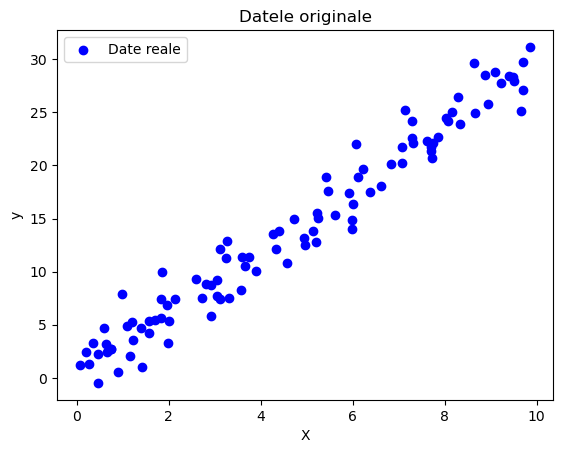

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generăm un set de date sintetic
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 de puncte între 0 și 10
y = 3 * X.squeeze() + np.random.randn(100) * 2  # Relație liniară cu zgomot

# Împărțim în set de antrenare și testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vizualizăm datele
plt.scatter(X, y, color="blue", label="Date reale")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Datele originale")
plt.legend()
plt.show()


### 2️⃣ Aplicăm Ridge Regression
Acum vom antrena un model de Ridge Regression și îl comparăm cu OLS (regresia clasică).

In [6]:
from sklearn.linear_model import LinearRegression

# Modelul OLS (regresie liniară clasică)
ols = LinearRegression()
ols.fit(X_train, y_train)
y_pred_ols = ols.predict(X_test)

# Modelul Ridge cu lambda (alpha) = 1.0
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Afișăm coeficienții
print(f"Coeficienți OLS: {ols.coef_}, Intercept: {ols.intercept_}")
print(f"Coeficienți Ridge: {ridge.coef_}, Intercept: {ridge.intercept_}")

# Calculăm eroarea
mse_ols = mean_squared_error(y_test, y_pred_ols)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ols = r2_score(y_test, y_pred_ols)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"MSE OLS: {mse_ols:.3f}, R² OLS: {r2_ols:.3f}")
print(f"MSE Ridge: {mse_ridge:.3f}, R² Ridge: {r2_ridge:.3f}")


Coeficienți OLS: [2.91972946], Intercept: 0.285826638917122
Coeficienți Ridge: [2.91543281], Intercept: 0.30593920458912294
MSE OLS: 2.615, R² OLS: 0.969
MSE Ridge: 2.611, R² Ridge: 0.969


# Interpretare:
MSE mic sugerează că modelul face predicții precise (diferențele sunt mici).

MSE mare sugerează că modelul face predicții imprecise (diferențele sunt mari).

Este important de menționat că MSE nu oferă o referință absolută pentru ce înseamnă "bun" sau "rău" – acest lucru depinde de datele tale și de contextul problemei.

### 3️⃣ Vizualizăm Rezultatele
Acum vom compara vizual predicțiile obținute cu OLS vs. Ridge.

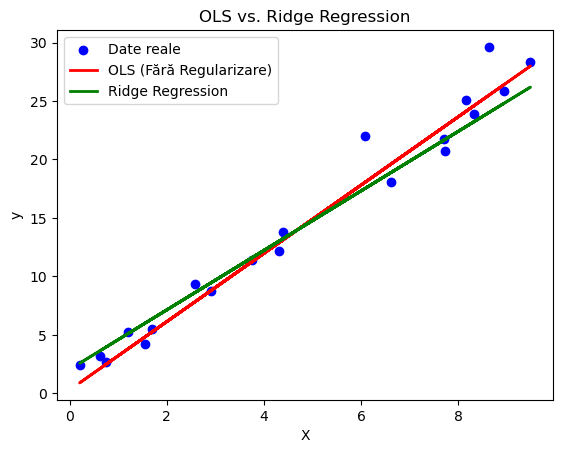

In [11]:
plt.scatter(X_test, y_test, color="blue", label="Date reale")
plt.plot(X_test, y_pred_ols, color="red", label="OLS (Fără Regularizare)", linewidth=2)
plt.plot(X_test, y_pred_ridge, color="green", label="Ridge Regression", linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("OLS vs. Ridge Regression")
plt.legend()
plt.show()


# Questions

### 1 Explain what is meant by "regression" and in which contexts to apply it

### 📌 What is Regression and When to Use It?
🔹 Regression is a supervised machine learning technique used to model the relationship between a dependent variable (Y) and one or more independent variables (X). The goal is to predict a continuous value based on input features.

🔹 Key Idea : Unlike classification (which predicts categories), regression predicts continuous values.
It finds a mathematical relationship between input 
𝑋
X and output 
𝑌
Y.

## 📌 Explanation of Linear Regression Models
# 1️⃣ Ordinary Least Squares (OLS) Regression
##### 🔹 Definition
OLS is the most basic form of linear regression. It finds the best-fitting line by minimizing the sum of the squared differences between actual and predicted values.

##### 🔹 Formula
𝑦^=𝑋𝛽+𝜖

##### y^ = predicted value
##### X = input features
##### 𝛽 = regression coefficients (weights)
##### 𝜖 = error terms (residual)
​
The cost function minimized in OLS is:

min∑(yi − y^i​)**2
 
###### 🔹 Strengths
✅ Easy to understand and interpret.
✅ Works well if data follows a linear pattern.

🔹 Weaknesses
❌ Sensitive to outliers.
❌ Assumes independent features, struggles with multicollinearity.

In [ ]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression()
ols.fit(X_train, y_train)
y_pred_ols = ols.predict(X_test)

### 2️⃣ Ridge Regression (L2 Regularization)

🔹 Definition :
Ridge regression is an extension of OLS that adds a penalty (L2 regularization) to prevent overfitting.

🔹 Formula :
min
⁡
∑
(
𝑦
𝑖
−
𝑦
^
𝑖
)
2
+
𝜆
∑
𝛽**2

 
𝜆
λ is a tuning parameter that controls the penalty.
🔹 Strengths
✅ Works well with multicollinear data.
✅ Reduces overfitting by shrinking large coefficients.

🔹 Weaknesses
❌ Does not perform feature selection (it shrinks coefficients but doesn’t set them to zero).

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)  # λ = 1.0
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

### 3️⃣ Lasso Regression (L1 Regularization)

🔹 Definition
Lasso (Least Absolute Shrinkage and Selection Operator) adds an L1 penalty, forcing some coefficients to be exactly zero, leading to automatic feature selection.

🔹 Formula
min
⁡
∑
(
𝑦𝑖
−
𝑦^𝑖
)
**2
+
𝜆
∑
∣
𝛽
∣

🔹 Strengths
✅ Can be used for feature selection (sets some coefficients to zero).
✅ Helps in case of high-dimensional data with many irrelevant features.

🔹 Weaknesses
❌ Can be unstable if features are highly correlated.

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)  # λ = 0.1
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

### 4️⃣ Elastic Net Regression (L1 + L2 Regularization)

🔹 Definition
Elastic Net combines Lasso (L1) and Ridge (L2), benefiting from both.

🔹 Formula
min
⁡
∑
(𝑦𝑖
−
𝑦^𝑖
)**2
+
𝜆1∑
∣
𝛽
∣
+
𝜆2
∑
𝛽**2
 
🔹 Strengths
✅ Works well when features are correlated.
✅ Balances between Ridge (shrinkage) and Lasso (feature selection).

🔹 Weaknesses
❌ Requires tuning two hyperparameters (
𝜆
1
,
𝜆
2
λ 
1
​
 ,λ 
2
​
 ).

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # λ and balance between L1/L2
elastic_net.fit(X_train, y_train)
y_pred_en = elastic_net.predict(X_test)